# Project

The goal of this project is to check if you understand the PCA and KMeans algorithms that we covered in class.

We will walk you through computing the principal components of a matrix that shows the nutrient composition of pizzas of different brands.

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np


# To plot pretty figures
%matplotlib inline

import matplotlib.pyplot as plt # data visualization

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set_theme()

## Loading and understanding the data

### Exercise 1

In the Google Drive of the course, you will find a file called `Pizza.csv`. Load it into this notebook and

1. create a `pandas` DataFrame called `pizza`
2. Drop the `id` column.
3. Print the first 10 rows.

In [62]:
# Your code here:
df = pd.read_csv("Pizza.csv")
print(df.shape)
df.head()


(300, 9)


,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


### Exercise 2

In [63]:
df_int = df.drop(['id'], axis=1) 
df_int = df_int.drop(['brand'], axis=1) 
df_int.head(10)

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,27.72,21.19,45.29,5.16,1.66,0.64,4.95


Print a numerical summary of each column using the `describe` method.

In [64]:
# Your code here:
df_int.describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


### Exercise 3

Let's inspect the dataset visually.

1. Get all scatter plots by pairs, and illuminate by the brand. (Hint: `sns.pairplot`. Pass the `corner=True` keyword argument :) )
2. Get a correlation matrix for the `pizza` dataframe, and plot it using the `heatmap` function inside `sns`.

In [65]:
# Your code for 3.1 here:
sns.pairplot(df_int, corner=True)

<AxesSubplot:>

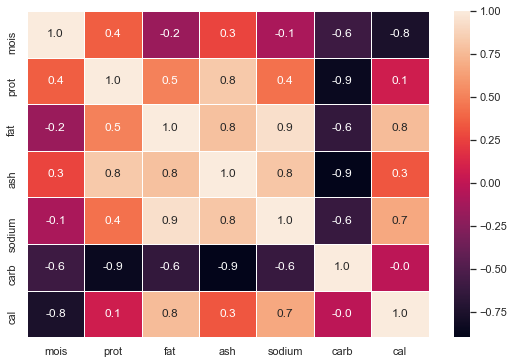

In [ ]:
# Your code for 3.2 here
# Compute the correlation matrix
df_int = df_int.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_int, annot=True, fmt='.1f' , linewidths=.5, ax=ax)

## Getting the principal components

Now let's use `sklearn` to get the principal components of this data.

### Exercise 4

From `sklearn.decomposition` import `PCA`.

### Exercise 5

Prepare your data for PCA:

1. Define an array `X` with the contents of the `pizza` DataFrame, except for the column `brand`. Print it and compare with the original `pizza` DataFrame (Hint `.values`).
2. Scale your data using a standard scaler and print it. Import what you need.

In [ ]:
# Your code for 5.1 here
X = df_int.values
print(f'pizza original df {df.shape}')
print(f'pizza X.values {X.shape}')

pizza original df (300, 9)
pizza X.values (7, 7)


In [ ]:
# Your code for 5.2 here    
scaler = StandardScaler()
X = scaler.fit_transform(df_int.values)

pca = PCA()
pca.fit(X)

PCA()

### Exercise 6

Create a PCA instance with `n_components=2`, call it `pca`. Fit it with the data X.

### Exercise 7

What are the explained variances of the principal components? What are the explained variance ratios? Print both of them.

In [ ]:
# Your code here
print(f'the components: \n {pca.components_} \n')
print(f'the explained varience: {pca.explained_variance_} \n')
print(f'the explained_variance_ratio_: {pca.explained_variance_ratio_}\n')

the components: 
 [[-1.28775872e-01 -4.21954040e-01 -4.27533588e-01 -4.62404186e-01
  -4.31472031e-01  4.26761674e-01 -2.01184801e-01]
 [ 6.28010611e-01  2.42512964e-01 -2.57545208e-01  7.36342784e-02
  -2.31742214e-01 -2.63001090e-01 -5.93434551e-01]
 [-4.20846230e-01  7.43799479e-01 -1.98325511e-01  5.00478105e-02
  -4.61961697e-01  4.86374101e-02  1.09721405e-01]
 [ 2.41991795e-01  1.81850553e-04  5.13788341e-01 -5.28742568e-01
  -4.62801657e-01 -3.16791596e-01  2.88704843e-01]
 [-1.08584610e-02 -3.77947182e-01  1.66574988e-01  7.00978162e-01
  -5.76647577e-01  1.05308011e-03  7.34634271e-02]
 [ 4.45243769e-01  6.52550435e-04 -5.39851153e-01  6.36713954e-02
   3.29041479e-03  1.90880661e-03  7.11512316e-01]
 [-3.93685090e-01 -2.58959560e-01 -3.58312063e-01 -5.71178276e-02
   4.41454149e-04 -8.03727339e-01 -1.80051472e-02]] 

the explained varience: [5.38050435e+00 2.69029512e+00 9.11295516e-02 4.35782889e-03
 3.79753814e-04 5.33074194e-08 4.39745500e-37] 

the explained_variance_rat

Expected answer:
```
[4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
```

### Exercise 8

Get two line plots using seaborn. Give them appropiate titles and make them pretty. :)
1. One with the explained variance per principal component
2. One with the **cumulative** explained ratios.

In [ ]:
sns.lineplot(x=np.arange(1, 7), y=np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("# of Principal Components")

ValueError: All arrays must be of the same length

In [ ]:
pca = PCA().fit(X)
print(len(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#sns.lineplot(x=np.arange(0,2), y=np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');

In [ ]:




=np.cumsum(full_pca.explained_variance_ratio_)

def plot_var(data):
    plt.clf()
    cum_var = np.cumsum(data)
    plt.plot(cum_var)
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.ylabel("Cumulative Explained Variance")
    plt.xlabel("# of Principal Components")
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.show()
plot_var(data)

In [ ]:
def plot_cumsum():
    plt.clf()
    cum_var = np.cumsum(data)
    plt.plot(cum_var)
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.ylabel("Cumulative Explained Variance")
    plt.xlabel("# of Principal Components")
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.show()
plot_var(data)

In [ ]:
sns.barplot(x=[1, 2], y=pca.explained_variance_ratio_)
plt.ylabel("Explained Variance")
plt.xlabel("# of Principal Components")

In [ ]:
# Your code for 8.1 here
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [ ]:
# Your code for 8.2 here


### Exercise 9

If we want more than 90% explaned variance, how many principal components do we need? What about 95%?

Your answer here: 

...

In [ ]:
# The following code performs PCA without reducing dimensionality, 
# then computes the minimum number of dimensions required to preserve 95% of the training set’s variance:
# the PCA plot also indicated that 2 components on hte x axis expains almost 100% 

pca_full = PCA()
X2D = pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(f'the number of principial components needed: {d}')


### Exercise 10

We will wrap up our PCA by showing the projection of all the data to the two principal components.

1. Create a new PCA object with `n_components=2`, call it `pca_2`, and fit it with `X`. Use the `transform` method to project the data to the plane. Call the output of `transform` an array `z`
2. Use `sns.scatterplot` with the first column of `z` as `x`, the second column of `z` as `y`, and `pizza["brand"]` as the `hue`. 

In [ ]:
# Your code for 10.1 and 10.2 here
pca_2 = PCA(n_components=2).fit(X)



## Comparing with KMeans

### Exercise 11

Let's assume we didn't know the brands, could we recover them using K-means clustering?

1. create a `KMeans` instance with `len(pizza["brand"].unique())` clusters, call it `kmeans`.
2. Fit it on the `z` that we just plotted in the last exercise.
3. Plot a `sns.scatterplot` with `hue` given by the cluster ids. Compare it with the plot from the previous exercise (Hint: `kmeans.labels_`)

In [ ]:
# Your code here. 


_, ax = plt.subplots(1, 1)

means = kmeans.cluster_centers_
ax.scatter(means[:, 0], means[:, 1], c="k", marker="x", s=50, zorder=10)
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=kmeans.labels_, ax=ax)